In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
infiles = {
    'ACCESS-ESM1-5': 'example_data/FFDIgt99p_yr_ACCESS-ESM1-5_ssp370_ensemble_aus-states_1850-2100.csv',
}

In [5]:
df_dict = {}
df_dict['ACCESS-ESM1-5'] = pd.read_csv(infiles['ACCESS-ESM1-5'])

In [6]:
df_dict['ACCESS-ESM1-5']

,year,model,run,experiment,NSW,VIC,QLD,SA,WA,TAS,NT,AUS
0,1950,ACCESS-ESM1-5,r1i1p1f1,historical,0.98,0.59,1.39,2.04,0.51,2.49,0.17,0.93
1,1950,ACCESS-ESM1-5,r2i1p1f1,historical,5.80,3.35,8.20,1.58,3.54,1.26,7.86,6.06
2,1951,ACCESS-ESM1-5,r1i1p1f1,historical,1.85,1.29,3.59,1.91,5.69,1.25,5.41,3.57
3,1951,ACCESS-ESM1-5,r2i1p1f1,historical,1.80,1.30,3.27,4.54,1.36,5.34,2.61,2.52
4,1952,ACCESS-ESM1-5,r1i1p1f1,historical,9.99,6.89,5.33,5.49,8.51,1.40,6.02,6.80
...,...,...,...,...,...,...,...,...,...,...,...,...
297,2098,ACCESS-ESM1-5,r2i1p1f1,ssp370,20.43,5.77,16.96,8.94,11.36,7.17,10.21,13.74
298,2099,ACCESS-ESM1-5,r1i1p1f1,ssp370,34.79,26.46,10.62,14.05,12.12,32.71,10.87,18.04
299,2099,ACCESS-ESM1-5,r2i1p1f1,ssp370,35.18,20.73,18.52,14.62,14.92,21.09,15.30,20.73
300,2100,ACCESS-ESM1-5,r1i1p1f1,ssp370,20.43,16.95,16.43,15.20,17.39,19.43,20.28,18.26


In [7]:
def plot_location(model, location, start_year=1950):
    """Scatterplot for a given location"""

    df = df_dict[model]
    fig, ax = plt.subplots(figsize=[15,7])
    sns.scatterplot(
        ax=ax,
        data=df[df['year'] >= start_year],
        x='year',
        y=location,
        hue='run',
    )
    ax.set_ylabel('FFDIgt99p')
    ax.set_title(f'{model} - {location}')
    ax.grid()
    plt.show()

In [8]:
def plot_dist(model, location, start_year=1950, end_year=2014):
    """Histogram for a given location"""

    df = df_dict[model]
    df_ref = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    fig, ax = plt.subplots()
    sns.histplot(
        ax=ax,
        data=df_ref,
        x=location,
    )
    ax.set_ylabel('FFDIgt99p')
    ax.set_title(f'{model} - {location}')
    ax.grid()
    plt.show()
    plt.close()

In [15]:
def plot_model_odds(
    model,
    location,
    ref_start=1950,
    ref_end=2014,
    runs_subsets=[],
):
    """Odds of a year higher than a given quantile for a given location."""

    fig, ax = plt.subplots()
    
    df = df_dict[model]
    runs_list = df['run'].unique()
    iter_runs = runs_subsets + [len(runs_list),]
    for nruns in iter_runs:
        runs = runs_list[0:nruns]
        df = df_dict[model]
        df = df[df['run'].isin(runs)]
        df_ref = df[(df['year'] >= ref_start) & (df['year'] <= ref_end)]
        p98 = df_ref[location].quantile(0.98)
        print(f'98th percentile = {p98} ({ref_start}-{ref_end}; {nruns} runs)') 
        window = nruns * 20
        odds = df[location].rolling(window, step=nruns, center=True).apply(lambda s: (sum(s > p98) / window) * 100)
        odds.index = df['year'].unique()
        odds = odds.dropna()
        sns.lineplot(
            ax=ax,
            data=odds,
            label=f'{nruns} runs',
        )
    ax.set_xlabel('year')
    ax.set_ylabel('odds of exceeding 1-in-50 year event (%)') 
    ax.set_title(f'FFDIgt99p - {model} - {location}')
    ax.grid()
    plt.show()
    plt.close()

In [10]:
def plot_ensemble_odds(
    location,
    ref_start=1950,
    ref_end=2014,
):
    """Ensemble odds of a year higher than a given quantile for a given location."""

    fig, ax = plt.subplots()
    for model, df in df_dict.items():
        df_ref = df[(df['year'] >= ref_start) & (df['year'] <= ref_end)]
        p98 = df_ref[location].quantile(0.98)
        print(f'98th percentile = {p98} ({ref_start}-{ref_end}; {model})')
        nruns = len(df['run'].unique())
        window = nruns * 20
        odds = df[location].rolling(window, step=nruns, center=True).apply(lambda s: (sum(s > p98) / window) * 100)
        odds.index = df['year'].unique()
        odds = odds.dropna()
        sns.lineplot(
            ax=ax,
            data=odds,
            label=f'{model}',
        )
    ax.set_xlabel('year')
    ax.set_ylabel('odds of exceeding 1-in-50 year event (%)') 
    ax.set_title(f'FFDIx - {location}')
    ax.grid()
    plt.show()
    plt.close()

## ACCESS-ESM1-5

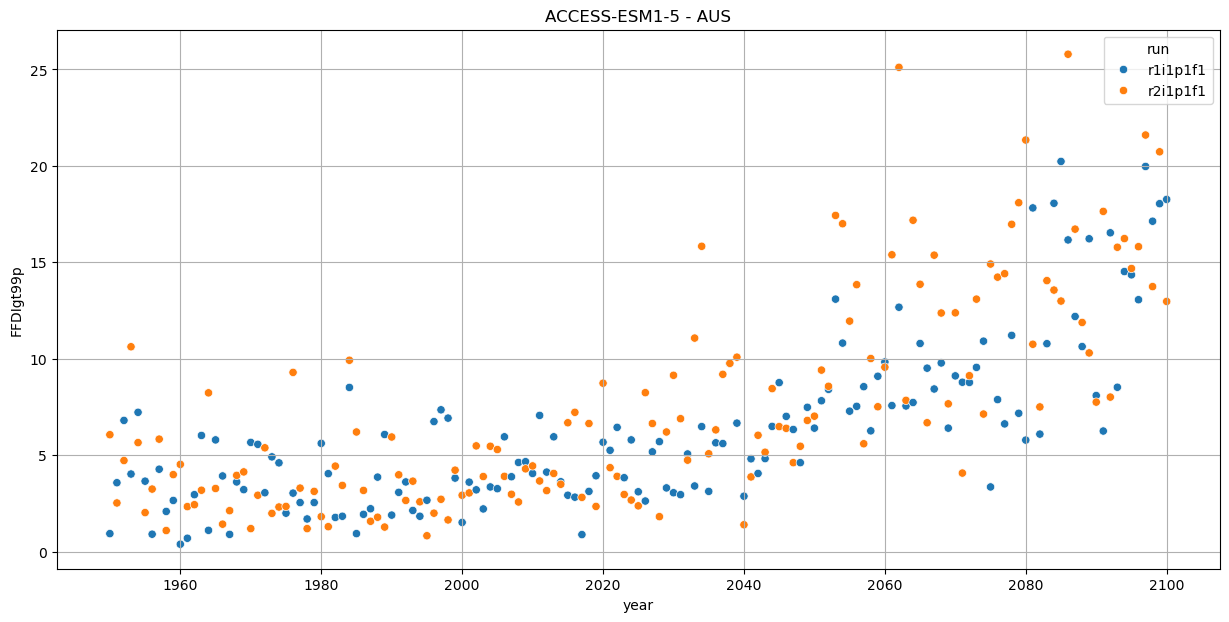

In [11]:
plot_location('ACCESS-ESM1-5', 'AUS')

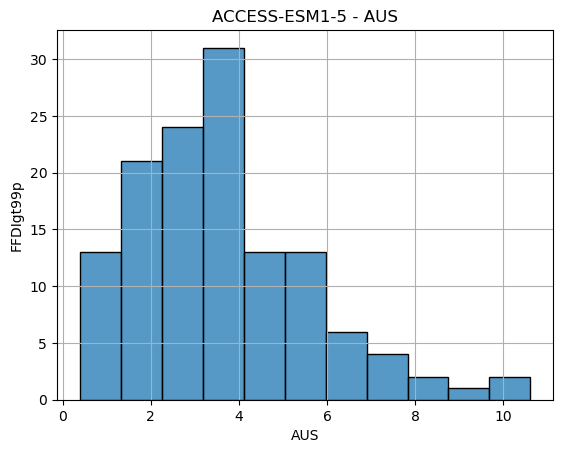

In [12]:
plot_dist('ACCESS-ESM1-5', 'AUS')

98th percentile = 8.8376 (1950-2014; 2 runs)


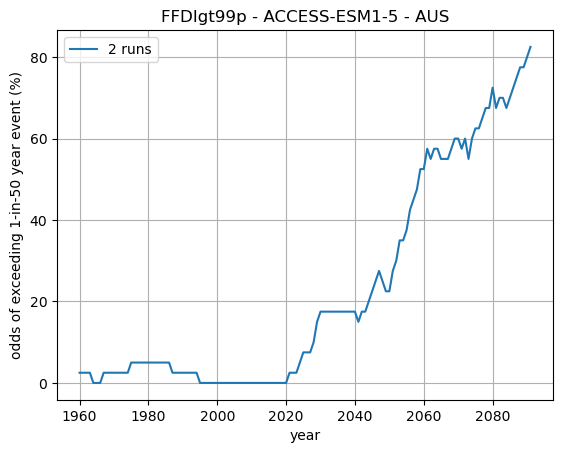

In [16]:
plot_model_odds('ACCESS-ESM1-5', 'AUS')

98th percentile = 11.7842 (1950-2014; 2 runs)


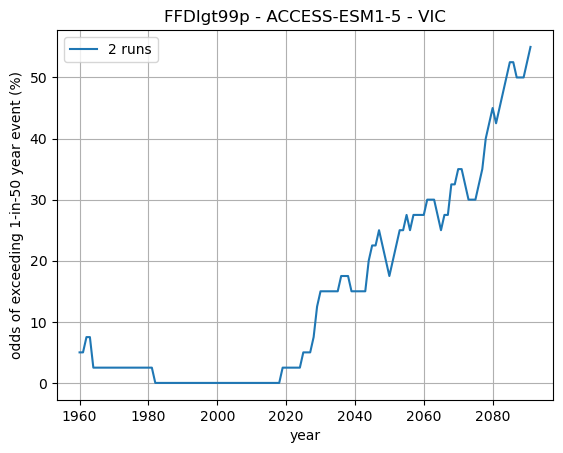

In [17]:
plot_model_odds('ACCESS-ESM1-5', 'VIC')

98th percentile = 7.854000000000001 (1950-2014; 2 runs)


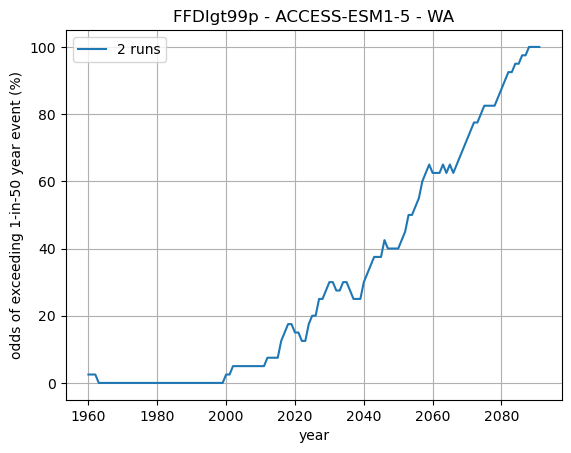

In [18]:
plot_model_odds('ACCESS-ESM1-5', 'WA')